## NLP 

Teilnehmer*innen clustern anhand der Textfelder.

Fav_Sportart, Fav_Essen in Tfidf-Vetoren umwandeln und mit KMeans mögliche Cluster herausfinden.

Fav_Musik, mithilfe von Spotify-API Genre herausfinden und anhand der Genres clustern.

In [158]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb  # data visualization library  
import matplotlib.pyplot as plt  # data visualization library 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [159]:
filename = "./data/survery_data_annonymized_230626.csv_clean"

data = pd.read_csv(filename)

In [160]:
#to_drop = ["Unnamed: 0"]#Wird nicht benötigt
#data = data.drop(to_drop, axis=1)
data["Fav_Sportart"]

0               joggen
1              fußball
2                  NaN
3            trampolin
4             klettern
            ...       
57                 NaN
58             fußball
59    ruderboot fahren
60        padel-tennis
61          ski fahren
Name: Fav_Sportart, Length: 62, dtype: object

## Fav_Sportart

In [219]:
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))

#NaN-Werte mit kein favorit überschreiben
sportarten = data["Fav_Sportart"].fillna('kein favorit')

tfidf_sportarten = vectorizer.fit_transform(sportarten)
print(tfidf_sportarten)

  (0, 18)	1.0
  (1, 14)	1.0
  (2, 23)	0.5773502691896258
  (2, 11)	0.5773502691896258
  (2, 22)	0.5773502691896258
  (3, 49)	1.0
  (4, 24)	1.0
  (5, 3)	1.0
  (6, 5)	1.0
  (7, 14)	1.0
  (8, 37)	1.0
  (9, 46)	1.0
  (10, 23)	0.5773502691896258
  (10, 11)	0.5773502691896258
  (10, 22)	0.5773502691896258
  (11, 20)	1.0
  (12, 13)	1.0
  (13, 47)	1.0
  (14, 4)	1.0
  (15, 4)	1.0
  (16, 45)	1.0
  (17, 48)	1.0
  (18, 48)	1.0
  (19, 1)	1.0
  (20, 14)	1.0
  :	:
  (53, 1)	1.0
  (54, 14)	1.0
  (55, 53)	1.0
  (56, 34)	0.34746692776192906
  (56, 52)	0.34746692776192906
  (56, 28)	0.34746692776192906
  (56, 19)	0.34746692776192906
  (56, 33)	0.34746692776192906
  (56, 27)	0.34746692776192906
  (56, 50)	0.3158071278236183
  (56, 8)	0.2759204970670213
  (56, 18)	0.3158071278236183
  (57, 23)	0.5773502691896258
  (57, 11)	0.5773502691896258
  (57, 22)	0.5773502691896258
  (58, 14)	1.0
  (59, 36)	0.6165583003438021
  (59, 35)	0.6165583003438021
  (59, 8)	0.48960364025844816
  (60, 30)	0.5948514633258525
  

In [162]:
kmeans = KMeans(n_clusters=16,random_state=0).fit(tfidf_sportarten) #ausprobieren, wie viele Cluster sinn ergeben

/Users/Laura/opt/anaconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [163]:
label_sportarten = kmeans.predict(tfidf_sportarten) #mögliche Labels vorhersagen für die einzelnen Sportarten
label_sportarten

array([13,  4,  7, 14, 11,  8, 14,  4, 14, 12,  7, 14, 14, 14,  3,  3,  9,
        2,  2,  1,  4, 14,  4,  1, 14, 14,  2,  4, 14, 15,  2, 14,  7,  6,
        8, 10, 14, 14,  5, 14,  8, 14,  6, 15,  0,  9,  4,  4,  4, 11, 14,
        6, 14,  1,  4,  5, 13,  7,  4, 10, 12, 10], dtype=int32)

In [164]:
#Cluster erstellen, jeweiligen Sportarten zu den Clustern zuordnen
cluster = {}
n = 0
for item in label_sportarten:
    try:
        if item in cluster:
            cluster[item].append(sportarten[n])
        else:
            cluster[item] = [sportarten[n]]
        n +=1
    except KeyError:
        continue  

In [165]:
for item in cluster:
    print ("Cluster ", item)
    for i in cluster[item]:
        print(i)

Cluster  13
joggen
joggen-laufen und rennrad fahren
Cluster  4
fußball
fußball
fußball
fußball
fußball
fußball
fußball
fußball
fußball
fußball
Cluster  7
kein favorit
kein favorit
kein favorit
kein favorit
Cluster  14
trampolin
chillen
schnorcheln
kampfsport
football
thaiboxen
schwimmen
radfahren
fitness
e-sport - cs:go
karate
tanzen
kraftsport und kampfsport
bogenschießen
hockey
yoga
inlineskaten
Cluster  11
klettern
klettern
Cluster  8
bouldern
bouldern
bouldern
Cluster  12
tennis
padel-tennis
Cluster  3
calisthenics
calisthenics
Cluster  9
tauchen
tauchen
Cluster  2
tischtennis
tischtennis
tischtennis
tischtennis
Cluster  1
basketball
basketball
basketball
Cluster  15
reiten
reiten
Cluster  6
badminton
badminton
badminton
Cluster  10
fahrrad fahren
ruderboot fahren
ski fahren
Cluster  5
volleyball
volleyball
Cluster  0
squash


In [166]:
#!pip install wordcloud matplotlib

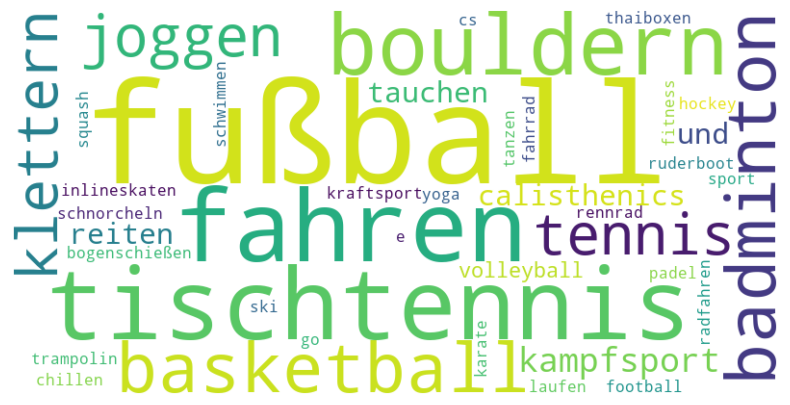

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#kein favorit für die Darstellung herausnehmen
sportarten = sportarten.str.replace('kein favorit','')
concatenated_text = ' '.join(sportarten)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Fav_Essen

In [168]:
essen = data["Fav_Essen"].fillna('kein favorit')

tfidf_essen = vectorizer.fit_transform(essen)
print(tfidf_essen)

  (0, 78)	0.6464055157972943
  (0, 36)	0.4868210145366179
  (0, 77)	0.5875076245908404
  (1, 9)	1.0
  (2, 36)	1.0
  (3, 7)	1.0
  (4, 15)	1.0
  (5, 53)	1.0
  (6, 72)	1.0
  (7, 51)	1.0
  (8, 57)	1.0
  (9, 70)	1.0
  (10, 33)	0.5773502691896257
  (10, 14)	0.5773502691896257
  (10, 32)	0.5773502691896257
  (11, 16)	1.0
  (12, 1)	0.6165583003438021
  (12, 47)	0.48960364025844816
  (12, 0)	0.6165583003438021
  (13, 27)	1.0
  (14, 13)	1.0
  (15, 7)	1.0
  (16, 52)	1.0
  (17, 7)	1.0
  (18, 64)	1.0
  :	:
  (56, 18)	0.4382995074088213
  (56, 37)	0.33200834817638997
  (57, 58)	1.0
  (58, 31)	0.5773502691896258
  (58, 17)	0.5773502691896258
  (58, 30)	0.5773502691896258
  (59, 29)	0.35126499304916736
  (59, 56)	0.35126499304916736
  (59, 41)	0.35126499304916736
  (59, 48)	0.35126499304916736
  (59, 65)	0.35126499304916736
  (59, 28)	0.35126499304916736
  (59, 55)	0.35126499304916736
  (59, 37)	0.2418362195733803
  (59, 47)	0.2789365080258134
  (60, 4)	0.3877209807102758
  (60, 54)	0.3877209807102758

In [169]:
kmeans = KMeans(n_clusters=15,random_state=0).fit(tfidf_essen)

In [170]:
label_essen = kmeans.predict(tfidf_essen) #mögliche Labels vorhersagen
label_essen

array([ 4,  9,  4,  1,  9,  5,  9,  7,  0,  6,  9,  3, 13,  9,  9,  1,  8,
        1,  9,  1,  0,  1,  0, 10,  2,  3,  9,  0,  9,  7,  0,  4,  3, 13,
        4,  9,  8,  3,  6, 10,  2,  4,  9, 11,  6,  8, 13,  9,  9,  0,  9,
        9,  7,  9, 10, 12, 10, 14,  2, 13,  5,  2], dtype=int32)

In [171]:
cluster_essen = {}
n = 0
for item in label_essen:
    try:
        if item in cluster_essen:
            cluster_essen[item].append(essen[n])
        else:
            cluster_essen[item] = [essen[n]]
        n +=1
    except KeyError:
        continue  

In [172]:
for item in cluster_essen:
    print ("Cluster ", item)
    for i in cluster_essen[item]:
        print(i)

Cluster  4
vegane lasagne
lasagne
lasagne
lasagne
lasagne
Cluster  9
butterbrot
dampfnudeln
tomaten
koreanisches dakgangjeong
hühnchen
curry
risotto
burrito
shakshuka
gurke mit mozzarella und tofu
hamburger
yaprak
lachs mit bratkartoffeln und gurkensalat
ramen
humus
cordon bleu
Cluster  1
burger
burger
burger
burger
burger
Cluster  5
pho
vegane pho bo suppe
Cluster  7
pasta
pasta
pasta
Cluster  0
pizza
pizza
pizza
pizza
pizza
pizza
Cluster  6
sushi
sushi
sushi
Cluster  3
döner
döner
döner
döner
Cluster  13
asiatische nudeln
nudeln
nudeln
nudeln mit pilzen in sahnesauce
Cluster  8
pfannkuchen
pfannkuchen
pfannkuchen
Cluster  10
reis mit sojasoße hähnchen
gemüsepfanne mit reis
reispfanne mit viel gemüse
ofenkartoffeln mit gemüse
Cluster  2
kein favorit
kein favorit
kein favorit
kein favorit
Cluster  11
tortelini
Cluster  12
carbonara
Cluster  14
pommes


## Musik

In [173]:
 mask_musik = data["Fav_Musik"]

In [174]:
import requests
import json

client_id = '41a0688d3752459bac10ddb127765ea2'
client_secret = '7fedd9c245e14936873e7ccb5df7ec89'

auth_url = 'https://accounts.spotify.com/api/token'

auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_response = requests.post(auth_url, data=auth_data)

access_token = auth_response.json().get('access_token')


headers = {
     'Accept': 'application/json',
     'Content-Type': 'application/json',
     'Authorization': 'Bearer {}'.format(access_token)}


#Später hier dann data["Fav_Musik"] benutzen
for artist in mask_musik: 

    url = f"https://api.spotify.com/v1/search?type=artist&q={artist}" #nach den Artisten mit dem Namen suchen
    response = requests.get( url, headers=headers)                   
    json_data = json.loads(response.text)

    items = json_data["artists"]["items"]

    for item in items:
        if(item["name"].lower() == artist):
            if(item["genres"] != []):
                data.loc[data["Fav_Musik"] == artist, "Musik_Genre"] = item["genres"][0]#Mehrere hinterlegt, erste sollte ausreichen

In [211]:
data["Musik_Genre"]

0                german indie
1            alternative rock
2     modern alternative rock
3                         NaN
4                         NaN
               ...           
57             german hip hop
58                        NaN
59                        NaN
60              acoustic rock
61                        NaN
Name: Musik_Genre, Length: 62, dtype: object

In [212]:
musik_genre = data["Musik_Genre"].fillna('kein favorit')

In [213]:
tfidf_musik = vectorizer.fit_transform(musik_genre)
print(tfidf_musik)

  (0, 44)	0.6406314566643054
  (0, 52)	0.5950641028002166
  (0, 41)	0.4852731707922286
  (1, 5)	0.6357062051864891
  (1, 71)	0.5458377142921664
  (1, 2)	0.5458377142921664
  (2, 61)	0.5676472063903771
  (2, 60)	0.5159254580627959
  (2, 5)	0.40784284918451436
  (2, 71)	0.35018693662739064
  (2, 2)	0.35018693662739064
  (3, 57)	0.5773502691896257
  (3, 34)	0.5773502691896257
  (3, 56)	0.5773502691896257
  (4, 57)	0.5773502691896257
  (4, 34)	0.5773502691896257
  (4, 56)	0.5773502691896257
  (5, 57)	0.5773502691896257
  (5, 34)	0.5773502691896257
  (5, 56)	0.5773502691896257
  (6, 64)	0.5773502691896257
  (6, 76)	0.5773502691896257
  (6, 63)	0.5773502691896257
  (7, 62)	0.6731836020078338
  (7, 60)	0.6118457984401741
  :	:
  (53, 33)	1.0
  (54, 67)	1.0
  (55, 57)	0.5773502691896257
  (55, 34)	0.5773502691896257
  (55, 56)	0.5773502691896257
  (56, 57)	0.5773502691896257
  (56, 34)	0.5773502691896257
  (56, 56)	0.5773502691896257
  (57, 43)	0.5816393166473143
  (57, 50)	0.3947905406404283


In [214]:
kmeans = KMeans(n_clusters=7,random_state=0).fit(tfidf_musik)

In [215]:
label_musik = kmeans.predict(tfidf_musik) #mögliche Labels vorhersagen
label_musik

array([6, 1, 1, 0, 0, 0, 4, 1, 4, 1, 3, 0, 3, 2, 0, 0, 5, 2, 4, 4, 6, 4,
       4, 4, 0, 4, 4, 2, 2, 4, 0, 2, 4, 0, 4, 4, 3, 0, 2, 4, 0, 6, 6, 0,
       2, 5, 2, 4, 1, 2, 3, 1, 1, 4, 3, 0, 0, 2, 0, 0, 1, 0], dtype=int32)

In [216]:
cluster_genre = {}
n = 0
for item in label_musik:
    try:
        if item in cluster_genre:
            cluster_genre[item].append(musik_genre[n])
        else:
            cluster_genre[item] = [musik_genre[n]]
        n +=1
    except KeyError:
        continue  

In [217]:
for item in cluster_genre:
    print ("Cluster ", item)
    for i in cluster_genre[item]:
        print(i)

Cluster  6
german indie
german indie folk
indie rock italiano
german soundtrack
Cluster  1
alternative rock
modern alternative rock
modern rock
alternative rock
alternative rock
german alternative rock
alternative rock
acoustic rock
Cluster  0
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
Cluster  4
orquesta tipica
dutch r&b
alternative metal
american metalcore
dfw rap
chicago rap
alternative metal
dark techno
future garage
british soul
canadian punk
alternative metal
permanent wave
gothenburg metal
avant-garde black metal
electropop
Cluster  3
alternative pop rock
pop
german pop
art pop
pop
Cluster  2
detroit hip hop
canadian hip hop
deep underground hip hop
german hip hop
canadian hip hop
hip hop
atl hip hop
hip hop
hip hop
german hip hop
Cluster  5
antideutsche
antideutsche


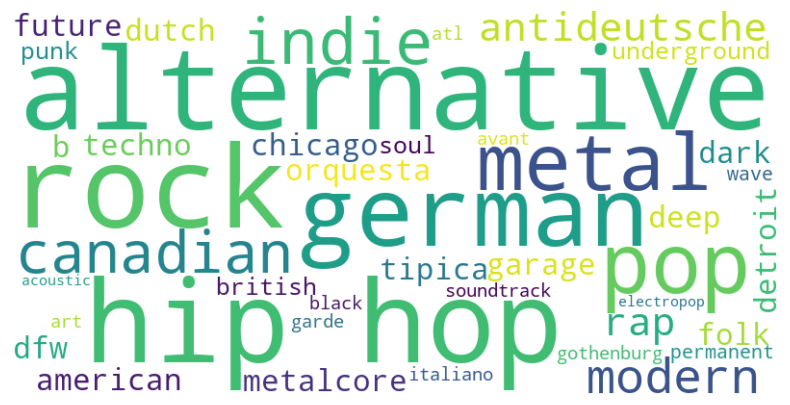

In [218]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#kein favorit für die Darstellung herausnehmen
musik_genre = musik_genre.str.replace('kein favorit','')
concatenated_text = ' '.join(musik_genre)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()